# Pryngles module: legacy

In [1]:
from pryngles import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
#@fulltest
class Test(unittest.TestCase):

    ##############################################################################
    # TEST RINGED PLANET
    ##############################################################################
    #Basic planet
    Rs=Const.Rsun/Const.au
    Rp=Const.Rsat/Const.au
    Ri=1.5
    Re=2.5
    i=30*DEG
    Ms=1
    a=0.2
    e=0.6
    Nr=10
    Np=20
    Ns=30
    Nb=50   
    #Simple planet
    P=RingedPlanet(Nr=10,Np=20,Nb=50)
    #Complete planet
    Pl=RingedPlanet(Nr=1000,Np=1000,Nb=100)
    #Light curve planet
    PL=RingedPlanet(Nr=1000,Np=1000,Nb=0)
    
    def test_system_ensamble(self):

            sys=System()
            S=sys.add("Star",name="Star",radius=Const.Rsun/Const.au)
            P=sys.add("Planet",name="Planet",parent=S,a=0.2,e=0.0,radius=Const.Rsat/Const.au)
            R=sys.add("Ring",name="Ring",parent=P,fi=1.5,fe=2.5,i=30*DEG)

            P=sys.ensamble_system(beta=30*DEG,lamb=90*DEG)
            fig1,fig2,fig3=P.plotRingedPlanet(showfig=0)

            P.changeObserver([90*DEG,30*DEG])
            lamb_initial=+0.0*DEG
            lamb_final=+360*DEG
            lambs=np.linspace(lamb_initial,lamb_final,100)
            Rps=[]
            Rrs=[]
            ts=[]
            for lamb in lambs:
                P.changeStellarPosition(lamb)
                ts+=[P.t*P.CU.UT]
                P.updateOpticalFactors()
                P.updateDiffuseReflection()
                Rps+=[P.Rip.sum()]
                Rrs+=[P.Rir.sum()]

            ts=np.array(ts)
            Rps=np.array(Rps)
            Rrs=np.array(Rrs)

            #Middle transit
            ts=(ts-ts[0])/Const.days

            #print(max(1e6*(Rps+Rrs)))

            #Plot
            #"""
            fig=plt.figure()
            ax=fig.gca()    
            ax.plot(ts,1e6*Rps,label="Planet")
            ax.plot(ts,1e6*Rrs,label="Ring")
            ax.plot(ts,1e6*(Rps+Rrs),label="Planet+Ring")

            ax.set_xlabel("Time since VE [days]")
            ax.set_ylabel("Flux anomaly [ppm]")

            ax.legend();
            #"""

            #"""
            #LEGACY
            attributes=dict(
                #Behavior
                behavior=dict(shadows=True),
                #Units
                CU=CanonicalUnits(UL=P.CU.UL,UM=P.CU.UM),
                #Basic
                Rstar=Const.Rsun/Const.au,Rplanet=Const.Rsat/Const.au,
                Rint=1.5,Rext=2.5,i=30*DEG,a=0.2,e=0.0,
                #Orbit 
                Mstar=1,x=0,lambq=0,t0=0,kepler=False,
                #Observer
                eobs_ecl=np.array([90.0*DEG,30.0*DEG]),
                #Sampling
                Np=1000,Nr=1000,Nb=0,Ns=30,
                #Physical properties
                physics=dict(
                    #Albedos
                    AS=1,AL=1,
                    #Ring geometrical opacity
                    taug=1.0, #Geometrical opacity
                    diffeff=1.0, #Diffraction efficiency
                    #Law of diffuse reflection on ring surface
                    reflection_rings_law=lambda x,y:x,
                    #Observations wavelength
                    wavelength=550e-9,
                    #Ring particle propeties (see French & Nicholson, 2000)
                    particles=dict(q=3,s0=100e-6,smin=1e-2,smax=1e2,Qsc=1,Qext=2),
                    #Stellar limb darkening
                    limb_cs=[0.6550],
                )
            )
            P=RingedPlanet(**attributes)
            #fig1,fig2,fig3=P.plotRingedPlanet(showfig=0)

            P.changeObserver([90*DEG,30*DEG])
            lamb_initial=+0.0*DEG
            lamb_final=+360*DEG
            lambs=np.linspace(lamb_initial,lamb_final,100)
            Rps=[]
            Rrs=[]
            ts=[]
            for lamb in lambs:
                P.changeStellarPosition(lamb)
                ts+=[P.t*P.CU.UT]
                P.updateOpticalFactors()
                P.updateDiffuseReflection()
                Rps+=[P.Rip.sum()]
                Rrs+=[P.Rir.sum()]

            ts=np.array(ts)
            Rps=np.array(Rps)
            Rrs=np.array(Rrs)


            print(max(1e6*(Rps+Rrs)))

            #Middle transit
            ts=(ts-ts[0])/Const.days

            #Plot
            fig=plt.figure()
            ax=fig.gca()    
            ax.plot(ts,1e6*Rps,label="Planet")
            ax.plot(ts,1e6*Rrs,label="Ring")
            ax.plot(ts,1e6*(Rps+Rrs),label="Planet+Ring")

            ax.set_xlabel("Time since VE [days]")
            ax.set_ylabel("Flux anomaly [ppm]")

            ax.legend();
            #""";

            """
            self.assertEqual(np.isclose([P.physics.wrot],
                                        [2*np.pi/PlanetDefaults.physics["prot"]],
                                        rtol=1e-7),
                             [True]*1)
            #Check exception: primary could not be different from None or Body
            self.assertRaises(AssertionError,lambda:Observer(primary="Nada"))
            """

    
    #"""                         
    #===========================================
    # TEST INITIALIZATION
    #===========================================
    def test_init_basic(self):
        #Stellar properties
        self.assertEqual(np.isclose([self.P.Mstar,self.P.mu,self.P.Rs],
                                    [self.Ms,self.Ms,1.0],
                                    rtol=1e-5).tolist(),
                         [True]*3)        

        #Planetary properties
        self.assertEqual(np.isclose([self.P.Rplanet,self.P.Rp],
                                    [self.Rp,self.Rp/self.Rs],
                                    rtol=1e-5).tolist(),
                         [True]*2)
        
        #Ring properties
        self.assertEqual(np.isclose([self.P.Rint/self.P.Rplanet,self.P.Rext/self.P.Rplanet],
                                    [self.Ri,self.Re],
                                    rtol=1e-5).tolist(),
                         [True]*2)        
        self.assertEqual(np.isclose([self.P.Ri/self.P.Rp,self.P.Re/self.P.Rp,self.P.i],
                                    [self.Ri,self.Re,self.i],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        
        #Areas 
        self.assertEqual(np.isclose([self.P.Ap,self.P.As,self.P.Ar],
                                    [0.022022495411633137,3.141592653589793,0.08808998164653253],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        #Orbit
        self.assertEqual(np.isclose([self.P.a,self.P.aplanet,self.P.e],
                                    [self.a,self.a/self.Rs,self.e],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        self.assertEqual(np.isclose([self.P.n,self.P.T],
                                    [11.180339887498947, 0.5619851784832581],
                                    rtol=1e-5).tolist(),
                         [True]*2)

        #Orientation    
        self.assertEqual(np.isclose(self.P.M_equ2ecl.flatten().tolist(),
                                    [1.0, 0.0, 0.0, 0.0, 0.8660254037844387, 0.49999999999999994, 0.0, -0.49999999999999994, 0.8660254037844387],
                                    rtol=1e-5).tolist(),
                         [True]*9)
        self.assertEqual(np.isclose(self.P.M_ecl2equ.flatten().tolist(),
                                    [1.0, -0.0, 0.0, -0.0, 0.8660254037844387, -0.49999999999999994, -0.0, 0.49999999999999994, 0.8660254037844387],
                                    rtol=1e-5).tolist(),
                         [True]*9)

    def test_init_sampling(self):
        
        #Check number of particles in rings
        self.assertEqual(self.P.Nr,8,True)
        self.assertEqual(self.P.Nrt,108,True)

        #Check sampling coordinates
        self.assertEqual(np.isclose(np.mean(self.P.ess,axis=0).tolist(),
                                    [0.7427234173627909, 3.060789891785035],
                                    rtol=1e-5).tolist(),
                         [True]*2)
        self.assertEqual(np.isclose(np.std(self.P.rps_equ,axis=0).tolist(),
                                    [0.04835780638007535, 0.04835489501121103, 0.04827854272496943],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        self.assertEqual(np.isclose(np.std(self.P.eps_equ,axis=0).tolist(),
                                    [1.8506539978100773, 0.6779827903869884],
                                    rtol=1e-5).tolist(),
                         [True]*2)
        self.assertEqual(np.isclose(np.std(self.P.rps_ecl,axis=0).tolist(),
                                    [0.04835780638007535, 0.04895307141434182, 0.04767190323759154],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        self.assertEqual(np.isclose(np.std(self.P.eps_ecl,axis=0).tolist(),
                                    [1.8950869732941793, 0.6649073367239384],
                                    rtol=1e-5).tolist(),
                         [True]*2)
        self.assertEqual(np.isclose(np.std(self.P.rrs_equ,axis=0).tolist(),
                                    [0.12452129618769214, 0.12196642974111802, 0.0],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        self.assertEqual(np.isclose(np.mean(self.P.ers_equ,axis=0).tolist(),
                                    [3.1335776702777403, 0.0],
                                    rtol=1e-5).tolist(),
                         [True]*2)
        self.assertEqual(np.isclose(np.std(self.P.rrs_ecl,axis=0).tolist(),
                                    [0.12452129618769214, 0.10562602656469813, 0.060983214870559],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        self.assertEqual(np.isclose(np.std(self.P.ers_ecl,axis=0).tolist(),
                                    [1.868080991010684, 0.3615248816986749],
                                    rtol=1e-5).tolist(),
                         [True]*2)

        #Check facet areas
        self.assertEqual(np.isclose([self.P.afp,self.P.afr,self.P.afs],
                                    [0.0118285470250286, 0.04585692412802634, 0.10471975511965977],
                                    rtol=1e-5).tolist(),
                         [True]*3)
                         
    def test_init_observer(self):
    
        #Observer
        self.assertEqual(np.isclose([self.P.io],
                                    [self.P.i],
                                    rtol=1e-5).tolist(),
                         [True]*1)
        self.assertEqual(np.isclose(self.P.nobs_ecl.tolist(),
                                    [0,0,1],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        self.assertEqual(np.isclose(self.P.nobs_equ.tolist(),
                                    [0, -0.4999999999999999, 0.8660254037844387],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        
        self.assertEqual(np.isclose(self.P.M_obs2equ.flatten().tolist(),
                                    [-1.0,0,0.0,0,-0.8660254037844387,-0.5,0,-0.5,0.8660254037844387],
                                    rtol=1e-5).tolist(),
                         [True]*9)
        
        #Update observer
        self.assertEqual(np.isclose([self.P.normr,self.P.normp],
                                    [0.2401218118135148, 0.3734628539073261],
                                    rtol=1e-5).tolist(),
                         [True]*2)
        
        self.assertEqual(np.isclose(np.mean(self.P.rps_obs,axis=0).tolist(),
                                    [-0.00126286, -0.00081802, -0.00047228],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        self.assertEqual(np.isclose(np.mean(self.P.rrs_obs,axis=0).tolist(),
                                    [-0.0035211684091234203, 0.00046198149704504594, 0.00026672514167958624],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        self.assertEqual(np.isclose(np.mean(self.P.nps_obs,axis=0).tolist(),
                                    [-0.015083302055958628, -0.009770192582955101, -0.005640823317803534],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        self.assertEqual(np.isclose([np.mean(np.linalg.norm(self.P.nps_obs,axis=1))],
                                    [1],
                                    rtol=1e-5).tolist(),
                         [True]*1)
        
    def test_init_stellar_pos(self):

        #Update stellar position
        self.assertEqual(np.isclose([self.P.rstar],
                                    [17.20751678624319],
                                    rtol=1e-5).tolist(),
                         [True]*1)
        self.assertEqual(np.isclose(self.P.rstar_ecl.tolist(),
                                    [17.20751678624319, 0.0, 0.0],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        self.assertEqual(np.isclose(self.P.rstar_equ.tolist(),
                                    [17.20751678624319, 0.0, 0.0],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        self.assertEqual(np.isclose(self.P.nstar_equ.tolist(),
                                    [1.0, 0.0, 0.0],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        self.assertEqual(np.isclose(self.P.estar_equ.tolist(),
                                    [0.0, 0.0],
                                    rtol=1e-5).tolist(),
                         [True]*2)
        self.assertEqual(np.isclose([self.P.thetas,self.P.thetap],
                                    [0.05804884790101778,0.0048656033146136455],
                                    rtol=1e-5).tolist(),
                         [True]*2)        
        self.assertEqual(np.isclose(self.P.rstar_ecl.tolist(),
                                    [17.20751678624319, 0.0, 0.0],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        self.assertEqual(np.isclose(self.P.estar_ecl.tolist(),
                                    [0.0, 0.0],
                                    rtol=1e-5).tolist(),
                         [True]*2)

        self.assertEqual(np.isclose(self.P.rstar_obs.tolist(),
                                    [-1.72075168e+01,0,0.00000000e+00],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        self.assertEqual(np.isclose(self.P.nstar_obs.tolist(),
                                    [-1.0, 0.0, 0.0],
                                    rtol=1e-5).tolist(),
                         [True]*3)
                         
    def test_init_physics(self):
        #Physical properties
        self.assertEqual(np.isclose([self.P.gamma0,self.P.gammap0],
                                    [0.910080416049327,0.07957747154594767],
                                    rtol=1e-2).tolist(),
                         [True]*2)
        self.assertEqual(np.isclose([self.P.normlimb],
                                    [2.45567825755602],
                                    rtol=1e-5).tolist(),
                         [True]*1)

    def test_init_optical(self):
        #Optical factors
        self.assertEqual(np.isclose([np.std(self.P.etaps),np.mean(self.P.etars),
                                     np.std(self.P.zetaps),np.mean(self.P.zetars)],
                                    [0.5775748371240247, 0.0, 0.5693825632088421, 0.8660254037844385],
                                    rtol=1e-2).tolist(),
                         [True]*4)
        
        self.assertEqual(np.isclose([np.mean(self.P.ALps[self.P.ip])],
                                    [0.534933661599417],
                                    rtol=1e-2).tolist(),
                         [True]*1)        

        self.assertEqual(np.isclose([np.log10(np.mean(self.P.fluxips[self.P.ip])),
                                     np.log10(np.mean(self.P.afps))],
                                    [-6.213638359911997,-2.6522470205129283],
                                    rtol=1e-2).tolist(),
                         [True]*2)        

    #===========================================
    # TEST SINGLE ROUTINES
    #===========================================
    def test_incoming_stellar_flux(self):
        self.Pl.changeObserver([+0.0*DEG,90.0*DEG])
        self.Pl.changeStellarPosition(+30.0*DEG)
        self.Pl.updateOpticalFactors()
        self.assertEqual(np.isclose([(self.Pl.fluxips[:int(self.Pl.Np/3)]).sum()],
                                    [7.005543149865829e-07],
                                    rtol=1e-2).tolist(),
                         [True]*1)
        self.assertEqual(np.isclose([(self.Pl.fluxirs[:int(self.Pl.Nrt/3)]).sum()],
                                    [1.907901293374936e-06],
                                    rtol=1e-2).tolist(),
                         [True]*1)

    def test_facet_areas(self):
        self.Pl.changeObserver([+60.0*DEG,0.0*DEG])
        self.Pl.changeStellarPosition(+0.0*DEG)
        self.Pl.updateOpticalFactors()
        self.assertEqual(np.isclose([self.Pl.afps.std()],
                                    [2.542683621350747e-05],
                                    rtol=1e-2).tolist(),
                         [True]*1)
        self.assertEqual(np.isclose([self.Pl.afrs.mean()],
                                    [5.85031917e-05],
                                    rtol=1e-2).tolist(),
                         [True]*1)

    def test_update_geometrical_factors(self):
        self.Pl.changeObserver([+30.0*DEG,0.0*DEG])
        self.Pl.changeStellarPosition(+30.0*DEG)
        self.Pl.updateOpticalFactors()
        
        #Etas
        self.assertEqual(np.isclose([(self.Pl.etaps[:int(self.Pl.Np/3)]).sum()],
                                    [-55.08748471144108],
                                    rtol=1e-2).tolist(),
                         [True]*1)
        self.assertEqual(np.isclose([self.Pl.etars[0]],
                                    [0.25],
                                    rtol=1e-2).tolist(),
                         [True]*1)
        #Zetas
        self.assertEqual(np.isclose([(self.Pl.zetaps[:int(self.Pl.Np/3)]).sum()],
                                    [-55.087484711441064],
                                    rtol=1e-2).tolist(),
                         [True]*1)
        self.assertEqual(np.isclose([self.Pl.zetars[0]],
                                    [0.25],
                                    rtol=1e-2).tolist(),
                         [True]*1)
    
    def test_accelerate_lambertian_albedo_ring(self):  
        self.assertEqual(np.isclose([self.P.getLambertianAlbedoRing(0.0)],
                                    [self.P._calcLambertianAlbedoRing(0.0,gammap0=self.P.gammap0,reflection_law=self.P.reflection_rings_law)],
                                    rtol=1e-2).tolist(),
                         [True]*1)
        self.assertEqual(np.isclose([self.P.getLambertianAlbedoRing(0.85)],
                                    [self.P._calcLambertianAlbedoRing(0.85,gammap0=self.P.gammap0,reflection_law=self.P.reflection_rings_law)],
                                    rtol=1e-2).tolist(),
                         [True]*1)
        self.assertEqual(np.isclose([self.P.getLambertianAlbedoRing(1.00)],
                                    [self.P._calcLambertianAlbedoRing(1.00,gammap0=self.P.gammap0,reflection_law=self.P.reflection_rings_law)],
                                    rtol=1e-2).tolist(),
                         [True]*1)

    def test_lambertian_albedos(self):
        self.Pl.changeObserver([+0.0*DEG,90.0*DEG])
        self.Pl.changeStellarPosition(+30.0*DEG)
        self.Pl.updateOpticalFactors()
        self.assertEqual(np.isclose([(self.Pl.ALps[:int(self.Pl.Np/3)]).sum()],
                                    [-181.64819153404108],
                                    rtol=1e-2).tolist(),
                         [True]*1)
        self.assertEqual(np.isclose([(self.Pl.ALrs[:int(self.Pl.Nrt/3)]).sum()],
                                    [65.4287583053232],
                                    rtol=1e-2).tolist(),
                         [True]*1)

        self.Pl.changeStellarPosition(+0.0*DEG)
        self.Pl.updateOpticalFactors()
        self.assertEqual(np.isclose([(self.Pl.ALps[:int(self.Pl.Np/3)]).sum()],
                                    [-73.40696750315567],
                                    rtol=1e-2).tolist(),
                         [True]*1)
        self.assertEqual(np.isclose([(self.Pl.ALrs[:int(self.Pl.Nrt/3)]).sum()],
                                    [-284.0],
                                    rtol=1e-2).tolist(),
                         [True]*1)

    def test_find_gamma(self):
        self.P.AS=0.0
        self.assertEqual(np.isclose([self.P._findGamma()],
                                    [0.0],
                                    rtol=1e-2).tolist(),
                         [True]*1)
        self.P.AS=0.1
        self.assertEqual(np.isclose([self.P._findGamma()],
                                    [0.341796875],
                                    rtol=1e-2).tolist(),
                         [True]*1)
        self.P.AS=0.98
        self.assertEqual(np.isclose([self.P._findGamma()],
                                    [0.9921875],
                                    rtol=1e-2).tolist(),
                         [True]*1)

    def test_find_gammap(self):
        self.P.AL=0.0
        self.assertEqual(np.isclose([self.P._findGammap()],
                                    [0.0],
                                    rtol=1e-3).tolist(),
                         [True]*1)
        self.P.AL=0.1
        self.assertEqual(np.isclose([self.P._findGammap()],
                                    [0.0159149169921875],
                                    rtol=1e-3).tolist(),
                         [True]*1)
        self.P.AL=0.98
        self.assertEqual(np.isclose([self.P._findGammap()],
                                    [0.1558837890625],
                                    rtol=1e-3).tolist(),
                         [True]*1)
    
    def test_accelerate_lambertian_albedo_planet(self):
        self.assertEqual(np.isclose([self.P.getLambertianAlbedoPlanet(0.0)],
                                    [self.P._calcLambertianAlbedoPlanet(0.0)],
                                    rtol=1e-2).tolist(),
                         [True]*1)
        self.assertEqual(np.isclose([self.P.getLambertianAlbedoPlanet(0.85)],
                                    [self.P._calcLambertianAlbedoPlanet(0.85)],
                                    rtol=1e-2).tolist(),
                         [True]*1)
        self.assertEqual(np.isclose([self.P.getLambertianAlbedoPlanet(1.00)],
                                    [self.P._calcLambertianAlbedoPlanet(1.00)],
                                    rtol=1e-2).tolist(),
                         [True]*1)

    def test_lambertian_albedo_planet(self):
        self.P.updatePhysicalProperties(dict(AS=0.3))
        self.assertEqual(np.isclose([self.P._calcLambertianAlbedoPlanet(0.0),
                                     self.P._calcLambertianAlbedoPlanet(0.3),
                                     self.P._calcLambertianAlbedoPlanet(0.6),
                                     self.P._calcLambertianAlbedoPlanet(1.0),
                                     ],
                                    [0.5039089384890072, 0.3713696943832471, 0.3044823163855821, 0.24720433837777744],
                                    rtol=1e-3).tolist(),
                         [True]*4)

    def test_spherical_albedo(self):
        self.assertEqual(np.isclose([self.P._calcSphericalAlbedo(0.0),
                                     self.P._calcSphericalAlbedo(0.5),
                                     self.P._calcSphericalAlbedo(1.0)
                                    ],
                                    [0,0.14646627099560008,1],
                                    rtol=1e-3).tolist(),
                         [True]*3)

    def test_reflection_coefficient(self):
        self.assertEqual(np.isclose([self.P._calcReflectionCoefficient(0.1,0.1,gamma0=1),
                                     self.P._calcReflectionCoefficient(0.8,1.0,gamma0=1)],
                                    [1.9437612500000003, 1.0311283333333332],
                                    rtol=1e-5).tolist(),
                         [True]*2)
    
    def test_diffuse_reflection_function(self):
        self.assertEqual(np.isclose(self.P.fint(0.7,[0.1,0.5,0.7]).flatten().tolist(),
                                    [1.113, 1.318, 1.378],
                                    rtol=1e-5).tolist(),
                         [True]*3)

    """
    def test_activity(self):
        self.Pl.changeObserver([+30.0*DEG,0.0*DEG])
        #Normal up
        self.Pl.changeStellarPosition(60.0*DEG)
        self.assertEqual([self.Pl.ap.sum(),self.Pl.ar.sum()],[301,690],[True]*2)
        #Normal down
        self.Pl.changeStellarPosition(260.0*DEG)        
        self.assertEqual([self.Pl.ap.sum(),self.Pl.ar.sum()],[97,677],[True]*2)
        #Transit
        lamb=+210.0*DEG
        self.Pl._updateStellarPosition(lamb)
        self.Pl.changeStellarPosition(lamb+1*self.Pl.thetas)        
        self.assertEqual([self.Pl.ap.sum(),self.Pl.ar.sum()],[269,683],[True]*2)
        #Occultation
        lamb=+30.0*DEG
        self.Pl._updateStellarPosition(lamb)
        self.Pl.changeStellarPosition(lamb+1*self.Pl.thetas)        
        self.assertEqual([self.Pl.ap.sum(),self.Pl.ar.sum()],[230,384],[True]*2)
        
    def test_transitability(self):
        self.Pl.changeObserver([+30.0*DEG,0.0*DEG])
        #Transit
        lamb=+210.0*DEG
        self.Pl._updateStellarPosition(lamb)
        self.Pl.changeStellarPosition(lamb+1*self.Pl.thetas)
        self.assertEqual([self.Pl.tp.sum(),self.Pl.tr.sum()],[278,446],[True]*2)
        #Occultation
        lamb=+30.0*DEG
        self.Pl._updateStellarPosition(lamb)
        self.Pl.changeStellarPosition(lamb+1*self.Pl.thetas)
        self.assertEqual([self.Pl.cp.sum(),self.Pl.cr.sum()],[216,405],[True]*2)

    def test_visibility(self):
        self.Pl.changeStellarPosition(45.0*DEG)
        self.Pl.changeObserver([30.0*DEG,0.0*DEG])
        self.Pl._updateVisibility()
        self.assertEqual([self.Pl.vp.sum(),self.Pl.vr.sum()],[434,723],[True]*2)
        self.assertEqual([self.Pl.vpo.sum(),self.Pl.vro.sum()],[503,852],[True]*2)
    
    def test_shadow(self):
        self.Pl.changeStellarPosition(45.0*DEG)
        self.Pl._resetIllumination()
        self.Pl._updatePlanetShadow(epos=self.Pl.estar_equ,mask=self.Pl.sp)
        self.Pl._updateRingsShadow(epos=self.Pl.estar_equ,mask=self.Pl.sr)
        self.assertEqual(self.Pl.sp.sum(),122,True)        
        self.assertEqual(self.Pl.sr.sum(),103,True)        

    def test_update_illumination(self):
        self.Pl.changeObserver([+0.0*DEG,+90.0*DEG])
        self.Pl.changeStellarPosition(45.0*DEG)
        self.assertEqual([self.Pl.ip.sum(),self.Pl.np.sum()],[400,416],[True]*2)
        self.assertEqual([self.Pl.ir.sum(),self.Pl.nr.sum()],[749,749],[True]*2)
        self.Pl.changeStellarPosition(245.0*DEG)
        self.assertEqual([self.Pl.ip.sum(),self.Pl.np.sum()],[407,83],[True]*2)
        self.assertEqual([self.Pl.ir.sum(),self.Pl.nr.sum()],[0,0],[True]*2)
    """
    
    def test_update_sampling_observer(self):
        self.P._updateObserver([40.0*DEG,50.0*DEG])
        self.Pl.changeStellarPosition(0.0*DEG)
        self.P._updateSamplingObserver()
        
        self.assertEqual(np.isclose(np.mean(self.P.rps_obs,axis=0).tolist(),
                                    [-0.00018511380521670282, -0.0014474464466447522, 0.0005980322218867171],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        self.assertEqual(np.isclose(np.mean(self.P.rrs_obs,axis=0).tolist(),
                                    [-0.002617261783639338, -0.0016673773470304288, 0.0017472806611232988],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        self.assertEqual(np.isclose(np.mean(self.P.nps_obs,axis=0).tolist(),
                                    [-0.0022109579383547294, -0.01728797702476117, 0.007142763268382224],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        self.assertEqual(np.isclose([np.mean(np.linalg.norm(self.P.nps_obs,axis=1))],
                                    [1],
                                    rtol=1e-5).tolist(),
                         [True]*1)

        self.assertEqual(np.isclose([self.P.normr,self.P.normp],
                                    [0.2401218118135148, 0.35791377055410756],
                                    rtol=1e-5).tolist(),
                         [True]*2)

    def test_update_observer(self):
        self.P._updateObserver([40.0*DEG,50.0*DEG])
        #Normal to observer
        self.assertEqual(np.isclose(self.P.nobs_ecl.tolist(),
                                    [0.4924038765061041, 0.4131759111665348, 0.766044443118978],
                                    rtol=1e-5).tolist(),
                         [True]*3)

        #Transformation matrix
        self.assertEqual(np.isclose(self.P.M_obs2equ.flatten().tolist(),
                                    [-0.6427876096865393, -0.5868240888334654, 0.49240387650610407, 0.6634139481689385, -0.7478280708194912, -0.025201386257487385, 0.383022221559489, 0.3104684609733674, 0.8700019037522058],
                                    rtol=1e-5).tolist(),
                         [True]*9)        

        self.assertEqual(np.isclose([self.P.io*RAD],
                                    [29.541139271144967],
                                    rtol=1e-5).tolist(),
                         [True]*1)
        self.assertEqual(np.isclose(self.P.nobs_equ.tolist(),
                                    [0.4924038765061041, -0.0252013862574873, 0.8700019037522058],
                                    rtol=1e-5).tolist(),
                         [True]*3)

    def test_update_stellar_position(self):
        #Update by lambda
        self.P.changeObserver([0.0*DEG,90.0*DEG])
        self.P._updateStellarPosition(30.0*DEG)
        self.assertEqual(np.isclose([self.P.lamb*RAD,self.P.t,self.P.M*RAD,self.P.E*RAD,self.P.f*RAD],
                                    [29.999999999999996, 0.009698127996429691, 6.212487824211714, 
                                     15.261480424860114, 29.999999999999996],
                                    rtol=1e-5).tolist(),
                         [True]*5)
        
        #Update by time
        self.P._updateStellarPosition(0.25*self.P.T,kepler=True)
        self.assertEqual(np.isclose([self.P.lamb*RAD,self.P.t/self.P.T,self.P.M*RAD,self.P.E*RAD,self.P.f*RAD],
                                    [147.6875974348218, 0.25, 90.0, 119.82432332714434, 147.6875974348218],
                                    rtol=1e-5).tolist(),
                         [True]*5)        
        
        self.assertEqual(np.isclose([self.P.rstar],
                                    [55.855830977897924],
                                    rtol=1e-5).tolist(),
                         [True]*1)
        self.assertEqual(np.isclose(self.P.rstar_ecl.tolist(),
                                    [-47.20634019984805, 29.856913758252233, 0.0],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        self.assertEqual(np.isclose(self.P.rstar_equ.tolist(),
                                    [-47.20634019984805, 25.856845793247555, 14.928456879126115],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        self.assertEqual(np.isclose(self.P.nstar_equ.tolist(),
                                    [-0.8451461445185111, 0.46292115506220066, 0.267267653488734],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        self.assertEqual(np.isclose(spy.vnorm(self.P.nstar_equ),
                                    [1],
                                    rtol=1e-5).tolist(),
                         [True]*1)
        self.assertEqual(np.isclose(self.P.estar_equ.tolist(),
                                    [2.640485489653583, 0.2705564165918936],
                                    rtol=1e-5).tolist(),
                         [True]*2)        
        self.assertEqual(np.isclose([self.P.thetas,self.P.thetap],
                                    [0.017901321332265366, 0.0014989580720400028],
                                    rtol=1e-5).tolist(),
                         [True]*2)
        self.assertEqual(np.isclose(self.P.rstar_ecl.tolist(),
                                    [-47.20634019984805, 29.856913758252233, 0.0],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        self.assertEqual(np.isclose(self.P.estar_ecl.tolist(),
                                    [2.577634839597572, 0.0],
                                    rtol=1e-5).tolist(),
                         [True]*2)
        self.assertEqual(np.isclose(self.P.rstar_obs.tolist(),
                                    [29.85691375825223, 47.20634019984805, 0.0],
                                    rtol=1e-5).tolist(),
                         [True]*3)
        self.assertEqual(np.isclose(self.P.nstar_obs.tolist(),
                                    [0.534535306977468, 0.8451461445185111, 0.0],
                                    rtol=1e-5).tolist(),
                         [True]*3)        

    #===========================================
    # TEST LIGHT CURVE
    #===========================================
    def test_facets_onsky_ring(self):
        self.PL.changeObserver([+30.0*DEG,0.0*DEG])
        self.PL.changeStellarPosition(+60.0*DEG)
        
        cond=(self.PL.ar[self.PL.irn])*(self.PL.nr[self.PL.irn])*(~self.PL.tr[self.PL.irn])*(~self.PL.cr[self.PL.irn])
        isel=np.arange(self.PL.Nr)[cond][-1]
        rr=self.PL.rrs_equ[isel]
        msp,rijs,etaijs,zetaijs=self.PL._getFacetsOnSky(rr,observing_body="ring")
        self.assertEqual(msp.sum(),87014,True)

    def test_facets_onsky_planet(self):
        self.PL.changeObserver([+30.0*DEG,0.0*DEG])
        self.PL.changeStellarPosition(+60.0*DEG)
        
        cond=(self.PL.ap)*(self.PL.np)*(~self.PL.tp)*(~self.PL.cp)
        isel=np.arange(self.PL.Np)[cond][0]
        rp=self.PL.rps_equ[isel]
        msp,rijs,etaijs,zetaijs=self.PL._getFacetsOnSky(rp,observing_body="planet")
        self.assertEqual(msp.sum(),75071,True)

    def test_reflected_light(self):
        self.PL.changeObserver([+30.0*DEG,0.0*DEG])
        self.PL.changeStellarPosition(+60.0*DEG)
        self.PL.updateOpticalFactors()
        self.PL.updateDiffuseReflection()
        #print(self.PL.Rip.sum(),self.PL.Rir.sum())
        self.assertEqual(np.isclose([self.PL.Rip.sum(),self.PL.Rir.sum()],
                                    [8.950665510705045e-07,6.85930409233611e-07],
                                    #[1.4323229197963421e-06,2.743721636934445e-06],
                                    rtol=1e-5).tolist(),
                         [True]*2)        
    """
    def test_transit(self):
        self.PL.changeObserver([+30.0*DEG,0.0*DEG])
        lamb=+210.0*DEG
        self.PL._updateStellarPosition(lamb)
        self.PL.changeStellarPosition(lamb+1*self.PL.thetas)
        self.PL.updateOpticalFactors()
        self.PL.updateTransit()
        print(self.PL.Tip.sum(),self.PL.Tir.sum())
        self.assertEqual(np.isclose([self.PL.Tip.sum(),self.PL.Tir.sum()],
                                    [0.002664218155669836, 0.002138634697416637],
                                    rtol=1e-3).tolist(),
                         [True]*2)                                       
    """
    
    def test_shining_light(self):
        self.PL.changeObserver([+30.0*DEG,0.0*DEG])
        self.PL.changeStellarPosition(+60.0*DEG)
        self.PL.updateOpticalFactors()
        self.PL.updateShine()
        #print(self.PL.Sip.sum(),self.PL.Sir.sum())
        self.assertEqual(np.isclose([self.PL.Sip.sum(),self.PL.Sir.sum()],
                                    [1.688935266258278e-08,1.0324347642389317e-08],
                                    #[1.2011829720061195e-07,1.0222522655068123e-07],
                                    rtol=1e-5).tolist(),
                         [True]*2)            
    #"""
    def blank():pass
    
    def test_comparison(self):
    
        nspangles=1000

        sys=System()
        S=sys.add(kind="Star",nspangles=nspangles,
                  radius=Consts.rsun/sys.ul,limb_coeffs=[0.65])
        P=sys.add(kind="Planet",parent=S,nspangles=nspangles,
                  a=0.2,e=0.0,radius=Consts.rsaturn/sys.ul,spangle_type=0)
        R=sys.add(kind="Ring",parent=P,nspangles=nspangles,
                  fi=1.5,fe=2.5,i=30*Consts.deg,roll=-90*Consts.deg)
        sys.initialize_simulation()
        sys.spangle_system()
        sys.update_scatterers()

        RP=sys.ensamble_system(lamb=90*Consts.deg,beta=90*Consts.deg,AL=0.5,AS=0.5)
        RP._plot["fs"]=5

        ecl,obs,star=RP.plotRingedPlanet(showfig=1)
        sys.sg.plot2d(include=[P,R])

        RP.changeStellarPosition(45*Consts.deg)
        ecl,obs,star=RP.plotRingedPlanet(showfig=1)

        sys.integrate(sys.sim.particles[1].P/8)
        sys.update_perspective()
        sys.sg.plot2d(include=[P,R])

        RP.changeObserver([90.0*Consts.deg,0.0*Consts.deg])
        ecl,obs,star=RP.plotRingedPlanet(showfig=1)

        sys.update_perspective(n_obs=Science.direction(-90,0))
        sys.sg.plot2d(include=[P,R])


.....................

<IPython.core.display.Javascript object>


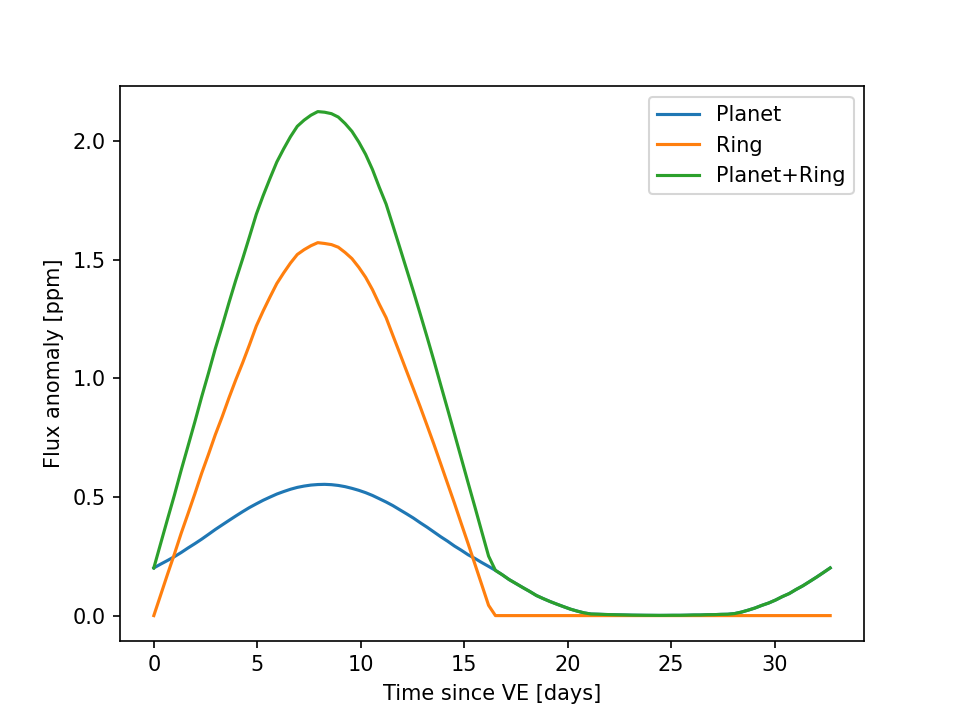

2.1245118303881245


<IPython.core.display.Javascript object>


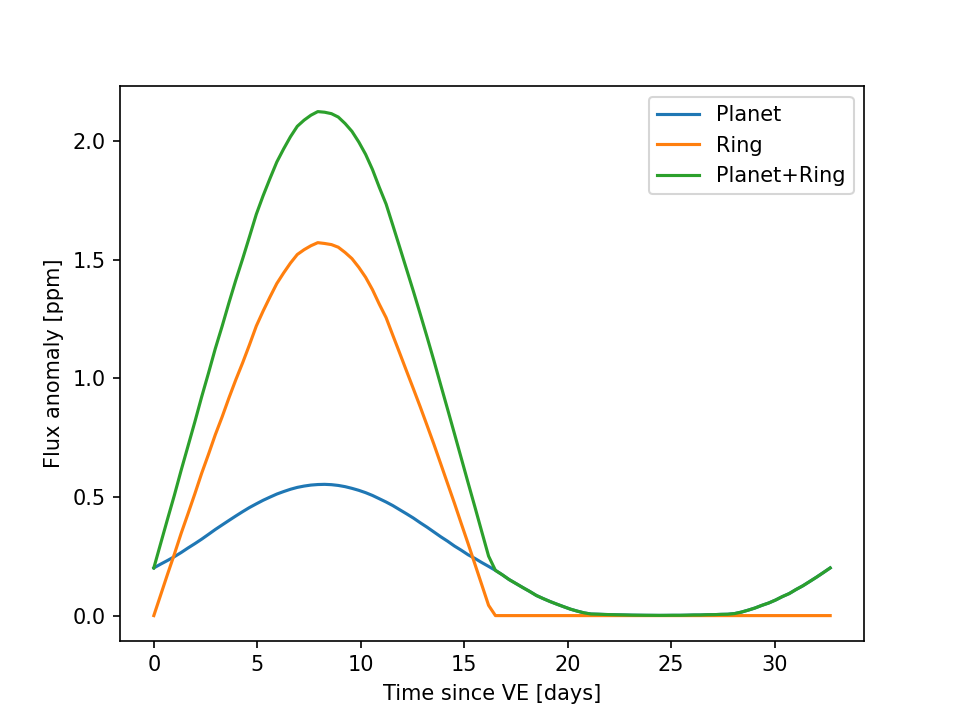

.....
----------------------------------------------------------------------
Ran 26 tests in 10.178s

OK


In [16]:
if __name__=="__main__":
    unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@fulltest

### The End

In [ ]:
#@end:module